In [290]:
import pandas as pd
import numpy as np
df = pd.read_csv("C:\\Users\\HP\\Downloads\\Student-Employability-Datasets.csv")

In [291]:
df

,Name of Student,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating,CLASS
0,Student 1,4,5,4,5,5,5,5,5,Employable
1,Student 2,4,4,4,4,4,4,3,5,Employable
2,Student 3,4,3,3,3,3,3,2,5,LessEmployable
3,Student 4,3,3,3,2,3,3,3,5,LessEmployable
4,Student 5,4,4,3,3,4,4,3,5,Employable
...,...,...,...,...,...,...,...,...,...,...
2977,Student 2996,4,3,3,3,3,3,2,5,Employable
2978,Student 2997,3,4,4,4,4,4,4,5,Employable
2979,Student 2998,4,5,4,5,4,4,4,5,Employable
2980,Student 2999,4,4,4,3,4,4,3,5,LessEmployable


In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2982 entries, 0 to 2981
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Name of Student             2982 non-null   object
 1   GENERAL APPEARANCE          2982 non-null   int64 
 2   MANNER OF SPEAKING          2982 non-null   int64 
 3   PHYSICAL CONDITION          2982 non-null   int64 
 4   MENTAL ALERTNESS            2982 non-null   int64 
 5   SELF-CONFIDENCE             2982 non-null   int64 
 6   ABILITY TO PRESENT IDEAS    2982 non-null   int64 
 7   COMMUNICATION SKILLS        2982 non-null   int64 
 8   Student Performance Rating  2982 non-null   int64 
 9   CLASS                       2982 non-null   object
dtypes: int64(8), object(2)
memory usage: 233.1+ KB


In [293]:
df.drop("Name of Student",axis=1,inplace=True)

In [294]:
df

,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating,CLASS
0,4,5,4,5,5,5,5,5,Employable
1,4,4,4,4,4,4,3,5,Employable
2,4,3,3,3,3,3,2,5,LessEmployable
3,3,3,3,2,3,3,3,5,LessEmployable
4,4,4,3,3,4,4,3,5,Employable
...,...,...,...,...,...,...,...,...,...
2977,4,3,3,3,3,3,2,5,Employable
2978,3,4,4,4,4,4,4,5,Employable
2979,4,5,4,5,4,4,4,5,Employable
2980,4,4,4,3,4,4,3,5,LessEmployable


In [295]:
df["CLASS"].replace("Employable","brown",inplace=True)
df["CLASS"].replace("LessEmployable","blue",inplace=True)

In [296]:
y = df["CLASS"]
y
df.drop("CLASS",axis=1,inplace=True)

In [297]:
power = 10
prev = ""
for _ in df.columns:
    if prev == "":
        prev = _
        pass
    else:
        df[_] = df[_]*power + df[prev]
        prev = _
        power = power * 10
        pass

In [298]:
X = df["Student Performance Rating"] / power

In [299]:
X

0       0.555555
1       0.534444
2       0.523333
3       0.533323
4       0.534433
          ...   
2977    0.523333
2978    0.544444
2979    0.544455
2980    0.534434
2981    0.544344
Name: Student Performance Rating, Length: 2982, dtype: float64

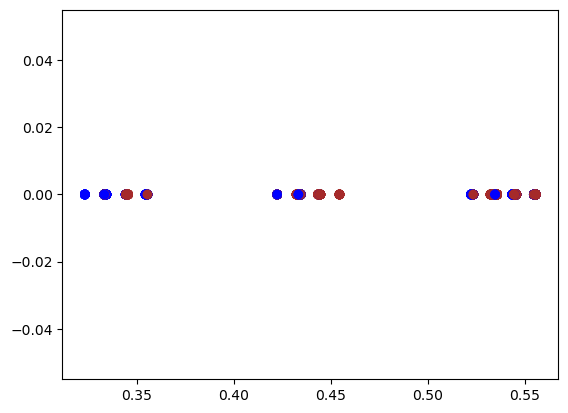

In [300]:
import matplotlib.pyplot as plt
plt.scatter(X,np.zeros(2982), c=y, cmap='winter')

In [301]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

poly = PolynomialFeatures(degree = 10)
std = StandardScaler()
X = std.fit_transform(X.to_numpy().reshape(-1,1))
X_poly = poly.fit_transform(X)


In [308]:
X_poly

array([[1.00000000e+00, 7.82993595e-01, 6.13078970e-01, ...,
        1.41275117e-01, 1.10617512e-01, 8.66128033e-02],
       [1.00000000e+00, 4.82379100e-01, 2.32689596e-01, ...,
        2.93162128e-03, 1.41415284e-03, 6.82157772e-04],
       [1.00000000e+00, 3.24153525e-01, 1.05075508e-01, ...,
        1.21900642e-04, 3.95145228e-05, 1.28087718e-05],
       ...,
       [1.00000000e+00, 6.24926087e-01, 3.90532615e-01, ...,
        2.32610458e-02, 1.45364344e-02, 9.08419705e-03],
       [1.00000000e+00, 4.82236697e-01, 2.32552232e-01, ...,
        2.92470488e-03, 1.41040002e-03, 6.80146647e-04],
       [1.00000000e+00, 6.23358229e-01, 3.88575481e-01, ...,
        2.27982533e-02, 1.42114788e-02, 8.85884224e-03]])

In [302]:
svm = LinearSVC(C=10,loss="hinge")
svm.fit(X_poly,y)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=10, loss='hinge')

In [303]:
y_predict = svm.predict(X_poly)

In [304]:
print(y_predict)

['brown' 'brown' 'brown' ... 'brown' 'brown' 'brown']


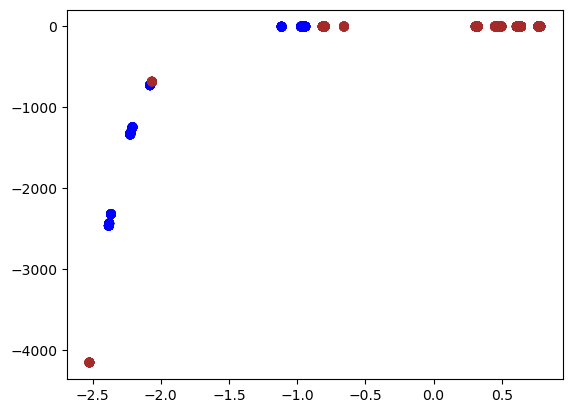

In [311]:
import matplotlib.pyplot as plt
plt.scatter(X,X_poly[:,9], c=y_predict, cmap='winter')